<a href="https://colab.research.google.com/github/ChamathkaM2001/Production-Based-Energy-Prediction-for-Sustainable-Manufacturing/blob/main/MLR__final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression - MSE: 349055.32590472844, R2: 0.042981393299982185

Linear Regression Metrics:
MAPE: 31.52%, MAE: 458.7848, RMSE: 590.8090


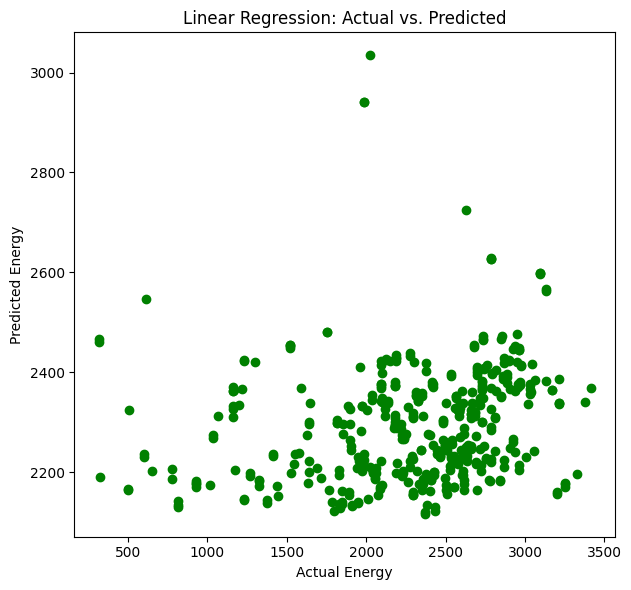

In [ ]:
import pandas as pd #data handling
import matplotlib.pyplot as plt #plotting
import seaborn as sns #statistical data vizualization


df = pd.read_csv('/content/import data.csv')

# Data Cleaning
df = df.drop_duplicates() #remove duplicates
df = df.dropna() #remove missing values

from sklearn.model_selection import train_test_split #imports the `train_test_split` function from scikit-learn, which is used to split the dataset into training and testing sets

# Select features and target
X = df[['Total(Tonnage)', 'Total(Energy-Mixing)', 'Total(Packing)', 'Total(HVAC)', 'Total(Lightning)', 'Total(Air curtain)', 'Total(Dihimudity)']]
y = df['Actual Energy']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random state ensures reusability

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
#performs linear regression,fits it to the training data, makes predictions on the test data
print(f"Linear Regression - MSE: {lr_mse}, R2: {lr_r2}")


from sklearn.metrics import mean_absolute_error

import numpy as np

# Defining mean_absolute_percentage_error function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculating metrics for Linear Regression
lr_mape = mean_absolute_percentage_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))


print("\nLinear Regression Metrics:")
print(f"MAPE: {lr_mape:.2f}%, MAE: {lr_mae:.4f}, RMSE: {lr_rmse:.4f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, lr_predictions, color='green')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Energy')
plt.ylabel('Predicted Energy')

plt.tight_layout()
plt.show()   #scatter plot comparing the actual energy values (`y_test`) with
#the predicted energy values (`lr_predictions`) for the linear regression model

# **Hyper Parameter Tuning**

In [ ]:


from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200], #number of estimators
    'max_depth': [None, 10, 20, 30], #maximum depth of trees
    'min_samples_split': [2, 5, 10], #minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] #minimum samples required in a leaf node
}

# Create a Random Forest Regressor instance
rf_model = RandomForestRegressor()  #the base estimator for the grid search.

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
#`estimator`: The base model  that will be tuned.
#`param_grid`: The dictionary of hyperparameter values to explore.
#`scoring`:  evaluate the models
# Fit the model to the training data
#`cv`: The number of folds in cross-validation
#`n_jobs`: The number of jobs to run in parallel during the cross-validation process

grid_search.fit(X_train, y_train)

# The best parameters and best estimator
best_params = grid_search.best_params_ #extract the best hyperparameters and the best estimators
best_rf_model = grid_search.best_estimator_

# Printing the best parameters
print("Best Hyperparameters:")
print(best_params)

# Predictions using the best model
best_rf_predictions = best_rf_model.predict(X_test) #best model to make predictions on the test set

# Evaluate the performance of the best model
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
best_rf_r2 = r2_score(y_test, best_rf_predictions)

print("\nBest Random Forest Regression - MSE: {best_rf_mse}, R2: {best_rf_r2}")


Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best Random Forest Regression - MSE: {best_rf_mse}, R2: {best_rf_r2}


In [ ]:

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Function to calculate adjusted R2
def adjusted_r2_score(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Calculate metrics for the best model
best_model_mape = mean_absolute_percentage_error(y_test, y_pred)
best_model_mae = mean_absolute_error(y_test, y_pred)
best_model_r2 = r2_score(y_test, y_pred)
best_model_mse = mean_squared_error(y_test, y_pred)

# Calculate adjusted R2
n = X_test.shape[0]  # number of samples
p = X_test.shape[1]  # number of features
best_model_adj_r2 = adjusted_r2_score(best_model_r2, n, p)

# Printing  metrics for the best model
print("\nBest Model Metrics:")
print(f"MAPE: {best_model_mape:.2f}%, MAE: {best_model_mae:.4f}, R2: {best_model_r2:.4f}, MSE: {best_model_mse:.4f}, Adjusted R2: {best_model_adj_r2:.4f}")



Best Model Metrics:
MAPE: 31.52%, MAE: 458.7848, R2: 0.0430, MSE: 349055.3259, Adjusted R2: 0.0273


# **Residual Analysis**

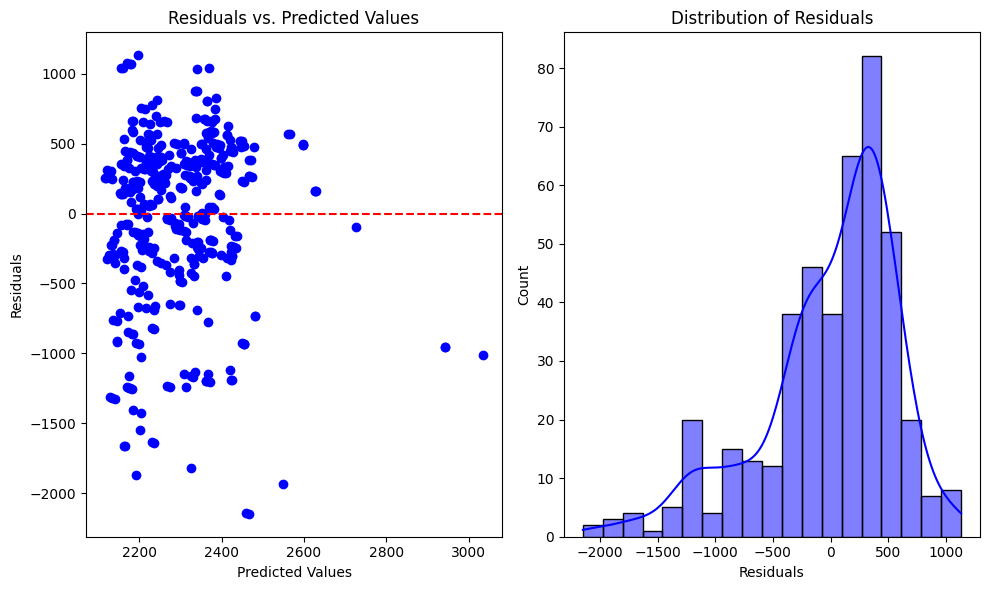

In [ ]:


# residuals
lr_residuals = y_test - lr_predictions #residuals by
#subtracting the predicted values (`lr_predictions`) from the true values (`y_test`)

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(lr_predictions, lr_residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Distribution of Residuals
plt.subplot(1, 2, 2)
sns.histplot(lr_residuals, kde=True, color='blue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()